<h1>🏠 Previsão de Preços de Casas<h1>

1. Importação das bibliotecas necessárias

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

2. Carregar os dataframes de treinamento e teste

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
X = train_df.drop(['SalePrice', 'Id'], axis=1)
y = train_df['SalePrice']

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

3. Limpagem dos dados e pré-processamento

Aqui faremos a checagem de quais dados possuem valores nulos ou não-encontrados, qual é o tamanho dos dados, qual é o tipo de dados (datatype) de cada coluna, quais são os valores únicos de variáveis categóricas, etc.

In [7]:
print(f'Número de rows: {len(train_df)}')
print(f'Número de columns: {len(train_df.columns)}')
print(f'Data types de cada column:\n{train_df.dtypes}')

Número de rows: 1460
Número de columns: 81
Data types de cada column:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [8]:
print(train_df.isnull().any().sum(), ' / ', len(train_df.columns))
print(train_df.isnull().any(axis=1).sum(), '/', len(train_df))

19  /  81
1460 / 1460


3.1. Lidando com valores não-encontrados

In [9]:
missing_values = train_df.isnull().sum().sort_values(ascending=False)
missing_columns = missing_values[missing_values > 0]

print(f'Colunas com valores faltantes:\n{missing_columns}')

Colunas com valores faltantes:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [10]:
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

In [11]:
num_cols_with_na = train_df.select_dtypes(include=['int64', 'float64']).columns[
    train_df.select_dtypes(include=['int64', 'float64']).isnull().sum() > 0
]

In [12]:
for col in num_cols_with_na:
    train_df[col] = train_df[col].fillna(train_df[col].median())

3.2. Encoding de variáveis categóricas

In [13]:
train_df['is_train'] = 1
test_df['is_train'] = 0

combined = pd.concat([train_df, test_df], axis=0)

One-hot encoding

In [14]:
combined = pd.get_dummies(combined, drop_first=True)

Dividindo os sets de treinamento e teste novamente

In [15]:
train = combined[combined['is_train'] == 1].drop(['is_train'], axis=1)
test = combined[combined['is_train'] == 0].drop(['is_train'], axis=1)

3.4. Verificando pré-processamento

In [16]:
print(f'Valores faltantes restantes:\n{train_df.isnull().sum().sum()}')

Valores faltantes restantes:
0


In [17]:
print(f'Preview do dataset processado:\n{train_df.head()}')

Preview do dataset processado:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave     0      Reg   
1   2          20       RL         80.0     9600   Pave     0      Reg   
2   3          60       RL         68.0    11250   Pave     0      IR1   
3   4          70       RL         60.0     9550   Pave     0      IR1   
4   5          60       RL         84.0    14260   Pave     0      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...      0     0           0       0      2   2008   
1         Lvl    AllPub  ...      0     0           0       0      5   2007   
2         Lvl    AllPub  ...      0     0           0       0      9   2008   
3         Lvl    AllPub  ...      0     0           0       0      2   2006   
4         Lvl    AllPub  ...      0     0           0       0     12   2008   

  SaleType  SaleCondition  SalePrice  is_train  


In [18]:
numerical_features = train_df.select_dtypes(include=['int64', 'float64'])

In [19]:
corr_matrix = numerical_features.corr()

In [20]:
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
print(saleprice_corr)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
is_train    

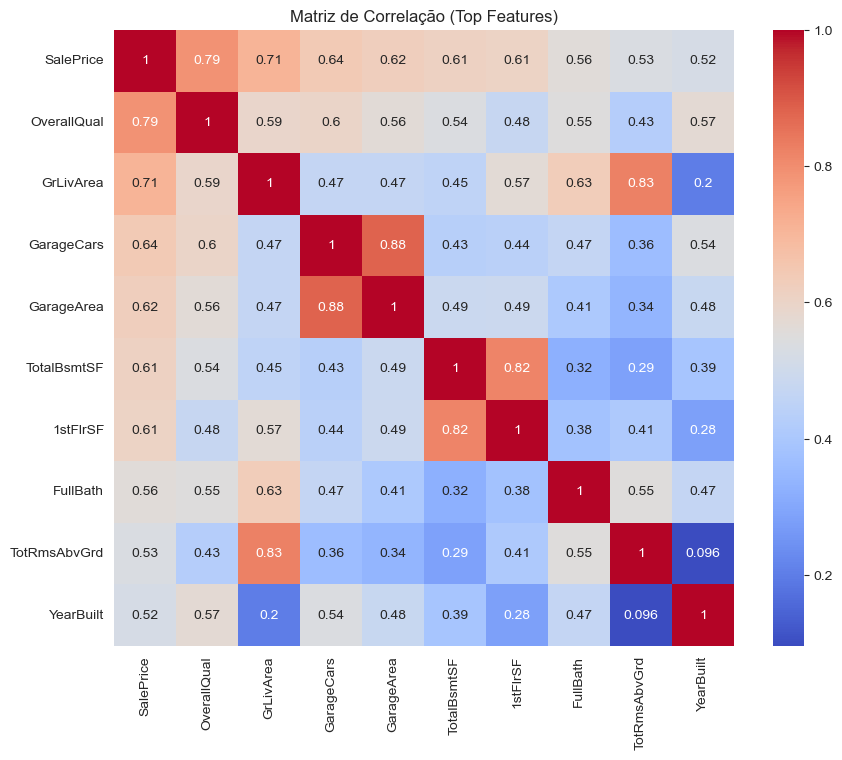

In [22]:
plt.figure(figsize=(10, 8))
top_corr_features = saleprice_corr.index[:10]
sns.heatmap(corr_matrix.loc[top_corr_features, top_corr_features], annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação (Top Features)')
plt.show()

<strong>Com esse gráfico, podemos analisar que as características (features) com maior correlação com o preço de vendas (SalePrice) são: </strong></br>
<ul>
    <li><strong>GrLivArea_x_Overall (0.83):</strong> Essa característica de interação (área habitacional acima do nível do terreno x qualidade geral) mostra uma correlação muito forte e positiva, indicando que casas maiores e de maior qualidade tendem a ter preços de venda maiores</li>
    <li><strong>OverallQuall (0.79):</strong> A Qualidade geral dos materiais da casa e o acabamento são indicadores fortes para preço de venda</li>
    <li><strong>TotalSF (0.78):</strong> Metragem quadrada total, que combina o primeiro andar, o segundo andar e as áreas de subsolo, também tem uma alta correlação com o preço de venda</li>
    <li><strong>GrLivArea (0.71):</strong> Área habitacional acima do nível do terreno (exceto o subsolo) é outra característica altamente correlacionada, como imóveis maiores são associados com maiores preços</li>
</ul>

<strong>Top Características para focar:</strong></br>
<ul>
    <li>GrLivArea_x_OverallQual, OverallQual, TotalSF e GrLivArea deveria ser priorizada na modelagem, já que mostram as maiores correlações com o preço de vendas (SalePrice)</li>
</ul>

4. Dividindo os dados

In [24]:
X = train.drop(['SalePrice', 'Id'], axis=1)
y = train['SalePrice']

In [25]:
X_test = test.drop(['Id'], axis=1)

In [26]:
print(f'Shape dos dados de treinamento: {X.shape}')
print(f'Shape dos dados de teste: {X_test.shape}')

Shape dos dados de treinamento: (1460, 267)
Shape dos dados de teste: (1459, 268)


test_size = 0.2: Reserva 20% dos dados para validação. random_state = 42: Garante reprodutibilidade por fixar a random seed

5. Construindo modelos de previsão

5.1. Regressão Linear

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

Função para pré-processar os dados

In [29]:
def prepare_data(data, is_train=True):
    for column in data.select_dtypes(include=['object']).columns:
        data[column] = data[column].fillna('Unknown')
        data[column] = LabelEncoder().fit_transform(data[column])
    
    data = data.fillna(0)
    
    if '1stFlrSF' in data and '2ndFlrSF' in data and 'TotalBsmtSF' in data:
        data['TotalSF'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF']
    if 'GrLivArea' in data and 'OverallQual' in data:
        data['GrLivArea_x_OverallQual'] = data['GrLivArea'] * data['OverallQual']
        
    return data

Pré-processar os dados de treinamento

In [30]:
X = prepare_data(train.drop(['SalePrice', 'Id'], axis=1))
y = train['SalePrice']

Pré-processar os dados de teste

In [31]:
X_test = prepare_data(test.drop(['Id'], axis=1), is_train=False)

In [32]:
missing_cols = set(X.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X.columns]

In [34]:
lr = LinearRegression()

lr_cv_rmse = -cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error').mean()
print(f'Linear Regression CV RMSE: {lr_cv_rmse:.4f}')

Linear Regression CV RMSE: 2274310603.8968


In [49]:
lr.fit(X, y)
lr_pred = lr.predict(X_test)

5.2. Árvore de Decisão

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
dt = DecisionTreeRegressor(random_state=42)

In [37]:
dt_cv_rmse = -cross_val_score(dt, X, y, cv=5, scoring='neg_mean_squared_error').mean()

print(f'Decision Tree CV RMSE: {dt_cv_rmse:.4f}')

Decision Tree CV RMSE: 1386196039.8616


In [39]:
dt.fit(X, y)
dt_pred = dt.predict(X_test)

5.3. Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [42]:
rf_cv_rmse = -cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error').mean()

print(f'Random Forest CV RMSE: {rf_cv_rmse:.4f}')

Random Forest CV RMSE: 915318023.7344


In [43]:
rf.fit(X, y)
rf_pred = rf.predict(X_test)

5.4. XGBoost

In [44]:
from xgboost import XGBRegressor

In [45]:
xgb = XGBRegressor(n_estimators=500, random_state=42, learning_rate=0.05, max_depth=4)

In [46]:
xgb_cv_rmse = -cross_val_score(xgb, X, y, cv=5, scoring='neg_mean_squared_error').mean()

print(f'XGBoost CV RMSE: {xgb_cv_rmse:.4f}')

XGBoost CV RMSE: 724973941.8149


In [47]:
xgb.fit(X, y)
xgb_pred = xgb.predict(X_test)

6. Avaliando performance dos modelos:

In [50]:
xgb_predictions = xgb.predict(X_test)
rf_predictions = rf.predict(X_test)
dt_predictions = dt.predict(X_test)
lr_predictions = lr.predict(X_test)

In [51]:
model_performance = {
    'Linear Regression': lr_cv_rmse,
    'Decision Tree': dt_cv_rmse,
    'Random Forest': rf_cv_rmse,
    'XGBoost': xgb_cv_rmse
}

In [53]:
for model, rmse in model_performance.items():
    print(f'{model}: CV RMSE =  {rmse:.4f}')

Linear Regression: CV RMSE =  2274310603.8968
Decision Tree: CV RMSE =  1386196039.8616
Random Forest: CV RMSE =  915318023.7344
XGBoost: CV RMSE =  724973941.8149
